In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [49]:
matches = pd.read_csv('matches.csv', index_col=0)
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,8/13/2023,16:30,Premier League,Matchweek 1,Sun,Away,D,1,1,Chelsea,...,Match Report,NaN,13,1,17.8,0,0,0,2023,Liverpool
1,8/19/2023,15:00,Premier League,Matchweek 2,Sat,Home,W,3,1,Bournemouth,...,Match Report,NaN,25,9,16.8,1,0,1,2023,Liverpool
2,8/27/2023,16:30,Premier League,Matchweek 3,Sun,Away,W,2,1,Newcastle Utd,...,Match Report,NaN,9,4,17.2,1,0,0,2023,Liverpool
3,9/3/2023,14:00,Premier League,Matchweek 4,Sun,Home,W,3,0,Aston Villa,...,Match Report,NaN,17,4,14.7,0,0,0,2023,Liverpool
4,9/16/2023,12:30,Premier League,Matchweek 5,Sat,Away,W,3,1,Wolves,...,Match Report,NaN,16,5,15.8,0,0,0,2023,Liverpool


In [50]:
data = matches

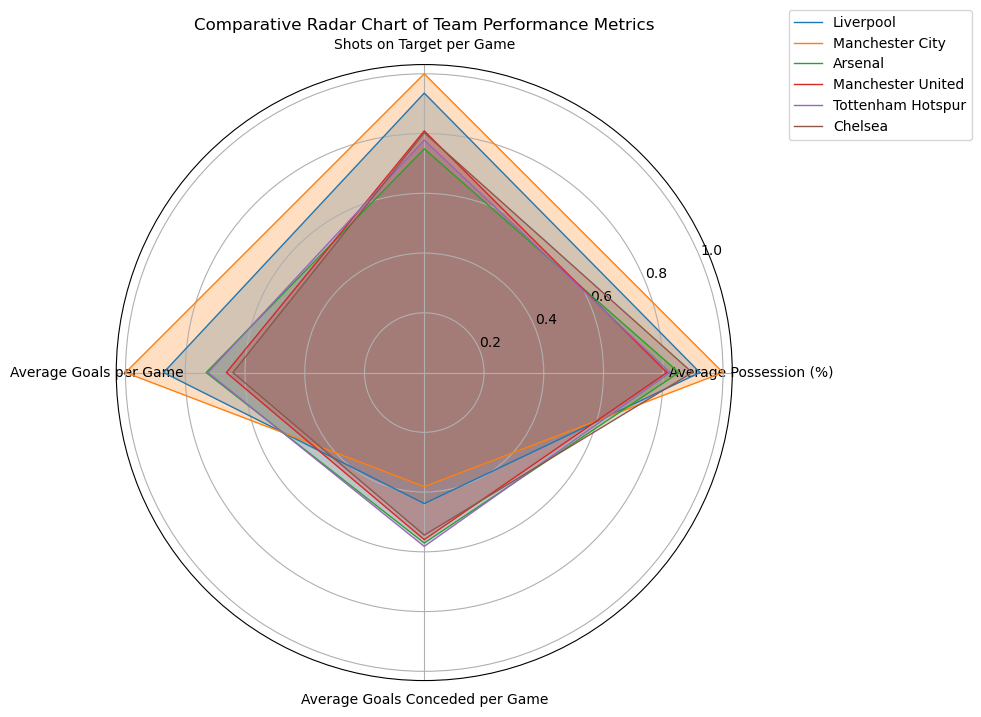

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi


# Calculate the metrics
metrics = {
    'Average Possession (%)': data.groupby('Team')['Poss'].mean(),
    'Shots on Target per Game': data.groupby('Team')['SoT'].mean(),
    'Average Goals per Game': data.groupby('Team')['GF'].mean(),
    'Average Goals Conceded per Game': data.groupby('Team')['GA'].mean(),
}

# Normalize these metrics
normalized_data = pd.DataFrame()
for key, series in metrics.items():
    normalized_data[key] = series / series.max()

# Select teams to compare
teams = ['Liverpool', 'Manchester City', 'Arsenal','Manchester United','Tottenham Hotspur','Chelsea']  
selected_team_data = normalized_data.loc[teams]

# Setup the radar chart
labels = normalized_data.columns
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Circular closure

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each team's metrics
for idx, row in selected_team_data.iterrows():
    data = row.tolist()
    data += data[:1]  # Circular closure
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=idx)
    ax.fill(angles, data, alpha=0.25)

ax.set_thetagrids([a * 180 / pi for a in angles[:-1]], labels)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
plt.title('Comparative Radar Chart of Team Performance Metrics')
plt.show()


In [51]:
# Convert 'Date' to datetime and sort data
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Team', 'Date'], inplace=True)

# Feature engineering (simplified)
data['Avg_Goals_Scored_3'] = data.groupby('Team')['GF'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
data['Avg_Goals_Conceded_3'] = data.groupby('Team')['GA'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
data["venue_code"] = data["Venue"].astype("category").cat.codes
data['Target'] = data['Result'].apply(lambda x: 1 if x == 'W' else 0)
# Calculate 'Shooting_Accuracy' and 'Goal_Efficiency' without division by zero
data['Shooting_Accuracy'] = data['SoT'] / data['Sh'].replace(0, 1)  # Replace 0 in 'Sh' with 1
data['Goal_Efficiency'] = data['GF'] / data['SoT'].replace(0, 1)    # Replace 0 in 'SoT' with 1

# Calculate rolling averages for 'Shooting_Accuracy' and 'Goal_Efficiency'
data['s_3'] = data.groupby('Team')['Shooting_Accuracy']\
                                       .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
data['g_3'] = data.groupby('Team')['Goal_Efficiency']\
                                      .transform(lambda x: x.rolling(window=3, min_periods=1).mean())

data


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Season,Team,Avg_Goals_Scored_3,Avg_Goals_Conceded_3,venue_code,Target,Shooting_Accuracy,Goal_Efficiency,s_3,g_3
1,2017-08-11,19:45,Premier League,Matchweek 1,Fri,Home,W,4,3,Leicester City,...,2017,Arsenal,4.000000,3.000000,1,1,0.370370,0.400000,0.370370,0.400000
2,2017-08-19,17:30,Premier League,Matchweek 2,Sat,Away,L,0,1,Stoke City,...,2017,Arsenal,2.000000,2.000000,0,0,0.333333,0.000000,0.351852,0.200000
3,2017-08-27,16:00,Premier League,Matchweek 3,Sun,Away,L,0,4,Liverpool,...,2017,Arsenal,1.333333,2.666667,0,0,0.000000,0.000000,0.234568,0.133333
4,2017-09-09,15:00,Premier League,Matchweek 4,Sat,Home,W,3,0,Bournemouth,...,2017,Arsenal,1.000000,1.666667,1,1,0.529412,0.333333,0.287582,0.111111
6,2017-09-17,13:30,Premier League,Matchweek 5,Sun,Away,D,0,0,Chelsea,...,2017,Arsenal,1.000000,1.333333,0,0,0.181818,0.000000,0.237077,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,2024-01-22,19:45,Premier League,Matchweek 21,Mon,Away,D,0,0,Brighton,...,2023,Wolverhampton Wanderers,2.333333,0.333333,0,0,0.375000,0.000000,0.443182,0.433333
26,2024-02-01,20:15,Premier League,Matchweek 22,Thu,Home,L,3,4,Manchester Utd,...,2023,Wolverhampton Wanderers,2.000000,1.333333,1,0,0.333333,0.600000,0.402778,0.366667
27,2024-02-04,14:00,Premier League,Matchweek 23,Sun,Away,W,4,2,Chelsea,...,2023,Wolverhampton Wanderers,2.333333,2.000000,0,1,0.461538,0.666667,0.389957,0.422222
28,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Home,L,0,2,Brentford,...,2023,Wolverhampton Wanderers,2.333333,2.666667,1,0,0.294118,0.000000,0.362996,0.422222


In [52]:
# Select features
selected_features = ['Avg_Goals_Scored_3', 'Avg_Goals_Conceded_3', 'venue_code', 'Team', 'Opponent','s_3','g_3']
X = data[selected_features].copy()  # Creating a copy to avoid setting with copy warning
y = data['Result']  # Assuming 'Result' is your target variable

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## 1) Logistic Regression

In [54]:
# Encode categorical variables
label_encoder = LabelEncoder()
X['Team'] = label_encoder.fit_transform(X['Team'])
X['Opponent'] = label_encoder.fit_transform(X['Opponent'])
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
# Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_model.predict(X_test_scaled)

# Classification report and accuracy
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_recall_fscore_support

# Predictions on the training set
y_train_pred = lr_model.predict(X_train_scaled)

# Calculate metrics for the training set
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print training metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")




              precision    recall  f1-score   support

           D       0.36      0.09      0.14       232
           L       0.57      0.78      0.66       368
           W       0.68      0.75      0.71       412

    accuracy                           0.61      1012
   macro avg       0.54      0.54      0.51      1012
weighted avg       0.57      0.61      0.56      1012

Accuracy: 0.607707509881423
Training Accuracy: 0.6166
Training Precision: 0.5808
Training Recall: 0.6166
Training F1 Score: 0.5609


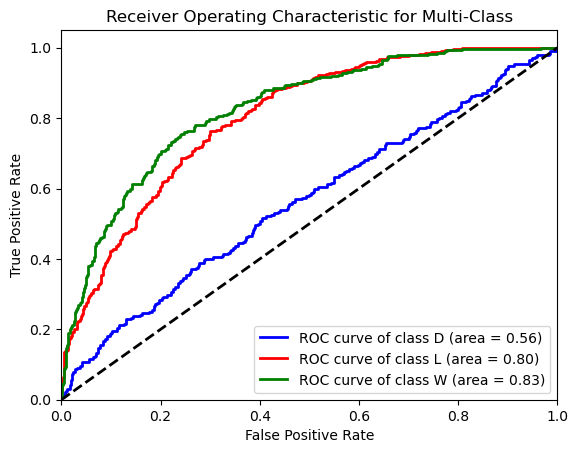

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Example data loading and preprocessing
# Assume X, y are defined and contain the feature matrix and target variable

# Encode categorical variables
label_encoder = LabelEncoder()
X['Team'] = label_encoder.fit_transform(X['Team'])
X['Opponent'] = label_encoder.fit_transform(X['Opponent'])
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Binarize the output classes for ROC curve (assuming 3 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Classifier
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42))
classifier.fit(X_train_scaled, y_train)
y_score = classifier.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
colors = ['blue', 'red', 'green']
class_labels = ['D', 'L', 'W']  # Define custom class labels
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

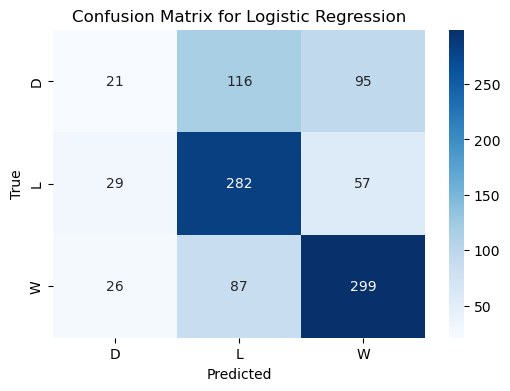

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, class_names):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for Logistic Regression')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names=label_encoder.classes_)

## 2) Random Forest Classifier

In [12]:
# Encode categorical variables
label_encoder = LabelEncoder()
X.loc[:, 'Team'] = label_encoder.fit_transform(X['Team'])
X.loc[:, 'Opponent'] = label_encoder.fit_transform(X['Opponent'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

# Classification report and accuracy
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Print validation (test) metrics
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")


              precision    recall  f1-score   support

           0       0.41      0.12      0.18       232
           1       0.58      0.78      0.67       368
           2       0.66      0.74      0.70       412

    accuracy                           0.61      1012
   macro avg       0.55      0.54      0.52      1012
weighted avg       0.58      0.61      0.57      1012

Accuracy: 0.6086956521739131
Training Accuracy: 0.6166
Training Precision: 0.5808
Training Recall: 0.6166
Training F1 Score: 0.5609
Validation Accuracy: 0.6067
Validation Precision: 0.5648
Validation Recall: 0.6067
Validation F1 Score: 0.5619


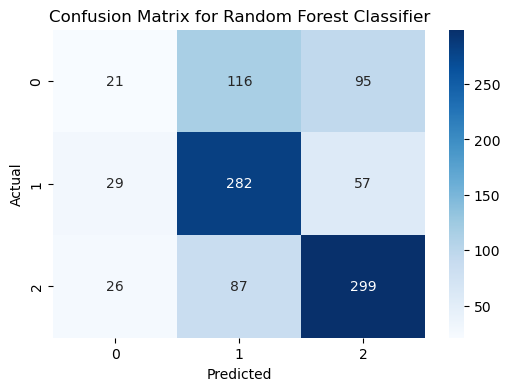

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are available from your Random Forest model code

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


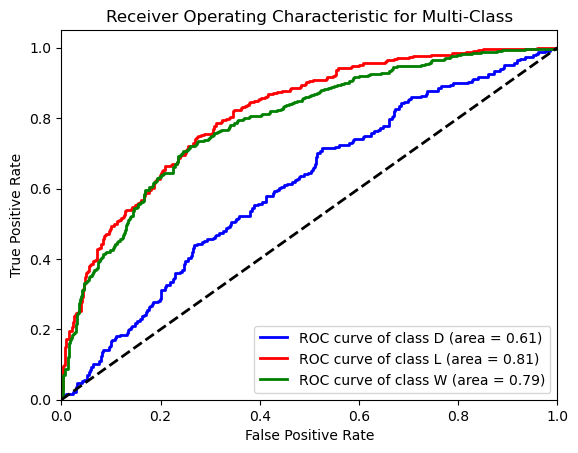

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Assuming X and y are predefined datasets

# Encode categorical variables
label_encoder = LabelEncoder()
X['Team'] = label_encoder.fit_transform(X['Team'])
X['Opponent'] = label_encoder.fit_transform(X['Opponent'])
y_encoded = label_encoder.fit_transform(y)

# Split the data using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict probabilities for ROC curve
y_score = rf_model.predict_proba(X_test_scaled)

# Binarize the output classes for ROC curve
unique_classes = np.unique(y_train)  # Ensures all classes are covered
y_test_bin = label_binarize(y_test, classes=unique_classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    if np.sum(y_test_bin[:, i]) > 0:  # Only compute ROC if there are positive samples
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
colors = ['blue', 'red', 'green']
class_labels = ['D', 'L', 'W']  # Define custom class labels
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


## 3) Gradient Boosting Classifier

In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
X.loc[:, 'Team'] = label_encoder.fit_transform(X['Team'])
X.loc[:, 'Opponent'] = label_encoder.fit_transform(X['Opponent'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred = gb_model.predict(X_test_scaled)

# Classification report and accuracy
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Print validation (test) metrics
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")



              precision    recall  f1-score   support

           0       0.35      0.14      0.20       232
           1       0.61      0.78      0.68       368
           2       0.68      0.74      0.71       412

    accuracy                           0.61      1012
   macro avg       0.54      0.55      0.53      1012
weighted avg       0.58      0.61      0.58      1012

Accuracy: 0.6146245059288538
Training Accuracy: 0.6166
Training Precision: 0.5808
Training Recall: 0.6166
Training F1 Score: 0.5609
Validation Accuracy: 0.6067
Validation Precision: 0.5648
Validation Recall: 0.6067
Validation F1 Score: 0.5619


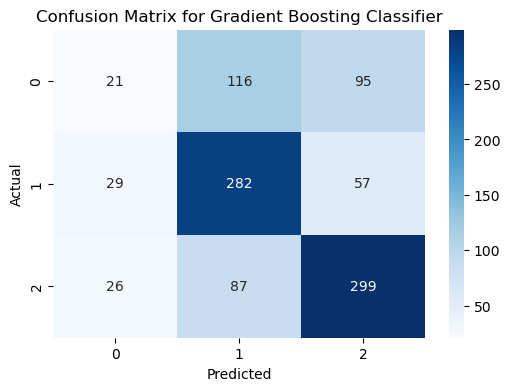

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are available from your Gradient Boosting model code

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


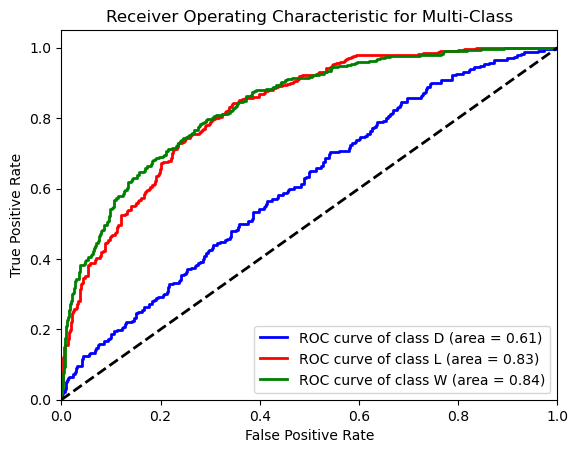

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Assuming X and y are predefined datasets

# Encode categorical variables
label_encoder = LabelEncoder()
X.loc[:, 'Team'] = label_encoder.fit_transform(X['Team'])
X.loc[:, 'Opponent'] = label_encoder.fit_transform(X['Opponent'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred = gb_model.predict(X_test_scaled)
y_score = gb_model.predict_proba(X_test_scaled)



# Binarize the output classes for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting

colors = ['blue', 'red', 'green']
class_labels = ['D', 'L', 'W']  # Define custom class labels
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

## 4) Support Vector Machine

In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
X.loc[:, 'Team'] = label_encoder.fit_transform(X['Team'])
X.loc[:, 'Opponent'] = label_encoder.fit_transform(X['Opponent'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# SVM classifier with RBF kernel and regularization
svm_model = SVC(kernel='rbf', C=0.5, class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

# Classification report and accuracy
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Print validation (test) metrics
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")


              precision    recall  f1-score   support

           0       0.28      0.31      0.30       232
           1       0.60      0.65      0.62       368
           2       0.70      0.61      0.65       412

    accuracy                           0.56      1012
   macro avg       0.53      0.52      0.52      1012
weighted avg       0.57      0.56      0.56      1012

Accuracy: 0.5553359683794467
Training Accuracy: 0.6166
Training Precision: 0.5808
Training Recall: 0.6166
Training F1 Score: 0.5609
Validation Accuracy: 0.6067
Validation Precision: 0.5648
Validation Recall: 0.6067
Validation F1 Score: 0.5619


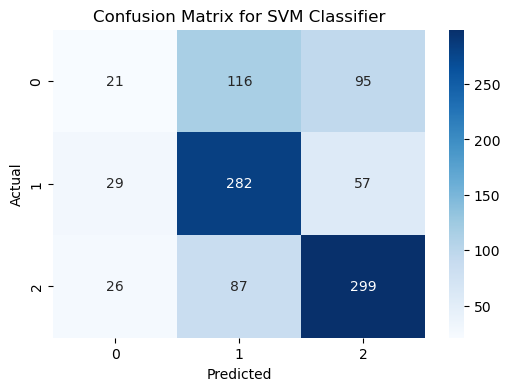

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are available from your SVM model code

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


              precision    recall  f1-score   support

           D       0.28      0.31      0.30       232
           L       0.60      0.65      0.62       368
           W       0.70      0.61      0.65       412

    accuracy                           0.56      1012
   macro avg       0.53      0.52      0.52      1012
weighted avg       0.57      0.56      0.56      1012

Accuracy: 0.5553359683794467


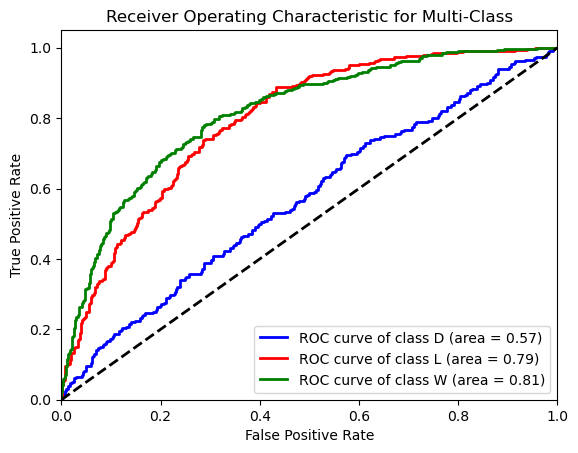

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Assuming X and y are predefined datasets

# Encode categorical variables
label_encoder = LabelEncoder()
X.loc[:, 'Team'] = label_encoder.fit_transform(X['Team'])
X.loc[:, 'Opponent'] = label_encoder.fit_transform(X['Opponent'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM classifier with RBF kernel, regularization, and probability estimation enabled
svm_model = SVC(kernel='rbf', C=0.5, class_weight='balanced', probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
y_score = svm_model.predict_proba(X_test_scaled)

# Classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Binarize the output classes for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting

colors = ['blue', 'red', 'green', 'purple', 'orange']
class_labels = ['D', 'L', 'W']  # Define custom class labels
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

## 5) Naive Bayes Classifier

In [16]:
# Encode categorical variables
label_encoder = LabelEncoder()
X['Team'] = label_encoder.fit_transform(X['Team'])
X['Opponent'] = label_encoder.fit_transform(X['Opponent'])
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Gaussian Naive Bayes classifier
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = gnb_model.predict(X_test_scaled)

# Classification report and accuracy
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Print validation (test) metrics
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")



              precision    recall  f1-score   support

           D       0.22      0.04      0.07       232
           L       0.56      0.79      0.65       368
           W       0.65      0.72      0.68       412

    accuracy                           0.59      1012
   macro avg       0.48      0.51      0.47      1012
weighted avg       0.52      0.59      0.53      1012

Accuracy: 0.5869565217391305
Training Accuracy: 0.6166
Training Precision: 0.5808
Training Recall: 0.6166
Training F1 Score: 0.5609
Validation Accuracy: 0.6067
Validation Precision: 0.5648
Validation Recall: 0.6067
Validation F1 Score: 0.5619


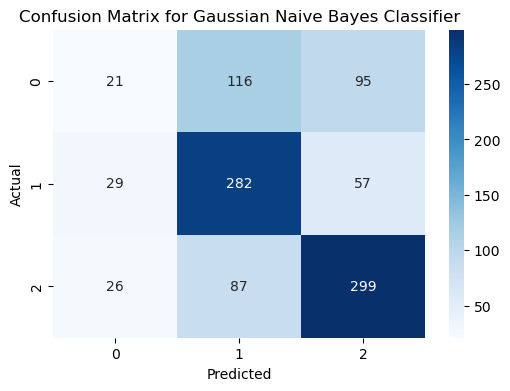

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are available from your Gaussian Naive Bayes model code

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()


              precision    recall  f1-score   support

           D       0.22      0.04      0.07       232
           L       0.56      0.79      0.65       368
           W       0.65      0.72      0.68       412

    accuracy                           0.59      1012
   macro avg       0.48      0.51      0.47      1012
weighted avg       0.52      0.59      0.53      1012

Accuracy: 0.5869565217391305


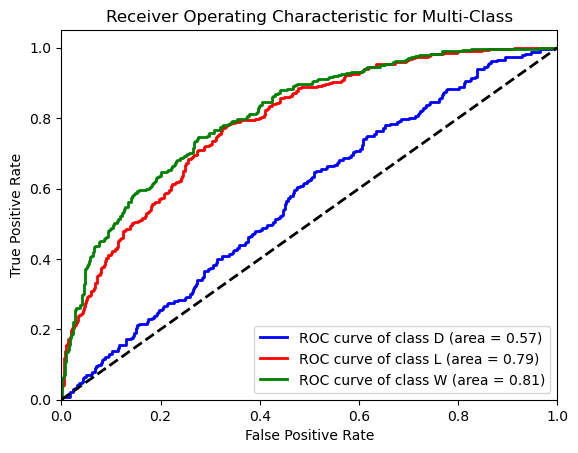

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming X and y are predefined datasets
# Define the mapping for the classes
class_mapping = {'D': 0, 'L': 1, 'W': 2}
inverse_class_mapping = {v: k for k, v in class_mapping.items()}  # To use in reports

# Encode categorical variables
label_encoder = LabelEncoder()
X['Team'] = label_encoder.fit_transform(X['Team'])
X['Opponent'] = label_encoder.fit_transform(X['Opponent'])
# Transform y to have custom labels and ensure y is properly encoded
y_transformed = label_encoder.fit_transform(y.map(class_mapping))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gaussian Naive Bayes classifier
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
y_pred = gnb_model.predict(X_test_scaled)
y_score = gnb_model.predict_proba(X_test_scaled)

# Classification report and accuracy
print(classification_report(y_test, y_pred, target_names=inverse_class_mapping.values()))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Binarize the output classes for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
colors = ['blue', 'red', 'green']  # Assign a color for each class
class_labels = ['D', 'L', 'W']  # Custom labels
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


## 6) Neural Network

In [18]:
# Encode categorical variables and target
label_encoder = LabelEncoder()
X['Team'] = label_encoder.fit_transform(X['Team'])
X['Opponent'] = label_encoder.fit_transform(X['Opponent'])
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Neural Network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(set(y_encoded)), activation='softmax')  # output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Print validation (test) metrics
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")




Epoch 1/50


405/405 [==============================] - 3s 4ms/step - loss: 0.9045 - accuracy: 0.5897
Epoch 2/50
405/405 [==============================] - 1s 3ms/step - loss: 0.8618 - accuracy: 0.6092
Epoch 3/50
405/405 [==============================] - 1s 3ms/step - loss: 0.8557 - accuracy: 0.6139
Epoch 4/50
405/405 [==============================] - 1s 3ms/step - loss: 0.8497 - accuracy: 0.6193
Epoch 5/50
405/405 [==============================] - 1s 3ms/step - loss: 0.8476 - accuracy: 0.6188
Epoch 6/50
405/405 [==============================] - 1s 3ms/step - loss: 0.8437 - accuracy: 0.6176
Epoch 7/50
405/405 [==============================] - 1s 3ms/step - loss: 0.8426 - accuracy: 0.6238
Epoch 8/50
405/405 [==============================] - 1s 3ms/step - loss: 0.8387 - accuracy: 0.6225
Epoch 9/50
405/405 [==============================] - 1s 3ms/step - loss: 0.8384 - accuracy: 0.6235
Epoch 10/50
405/405 [==============================] - 1s 3ms/step - loss: 0.8353 - accuracy: 0.

32/32 [==============================] - 0s 372us/step


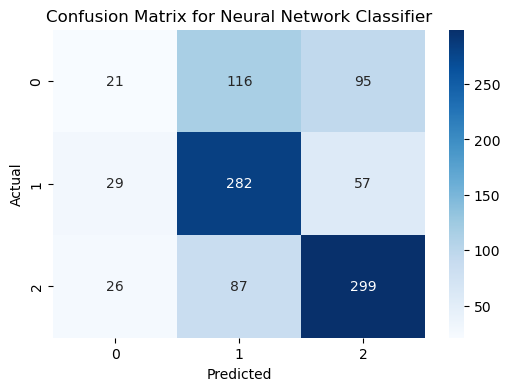

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming model architecture has been defined and trained as per your setup

# Predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network Classifier')
plt.show()


Epoch 1/50
405/405 [==============================] - 0s 290us/step - loss: 0.8874 - accuracy: 0.6025
Epoch 2/50
405/405 [==============================] - 0s 279us/step - loss: 0.8613 - accuracy: 0.6156
Epoch 3/50
405/405 [==============================] - 0s 280us/step - loss: 0.8526 - accuracy: 0.6168
Epoch 4/50
405/405 [==============================] - 0s 278us/step - loss: 0.8499 - accuracy: 0.6159
Epoch 5/50
405/405 [==============================] - 0s 277us/step - loss: 0.8449 - accuracy: 0.6218
Epoch 6/50
405/405 [==============================] - 0s 274us/step - loss: 0.8438 - accuracy: 0.6188
Epoch 7/50
405/405 [==============================] - 0s 278us/step - loss: 0.8406 - accuracy: 0.6193
Epoch 8/50
405/405 [==============================] - 0s 277us/step - loss: 0.8394 - accuracy: 0.6186
Epoch 9/50
405/405 [==============================] - 0s 277us/step - loss: 0.8374 - accuracy: 0.6233
Epoch 10/50
405/405 [==============================] - 0s 274us/step - loss: 0.834

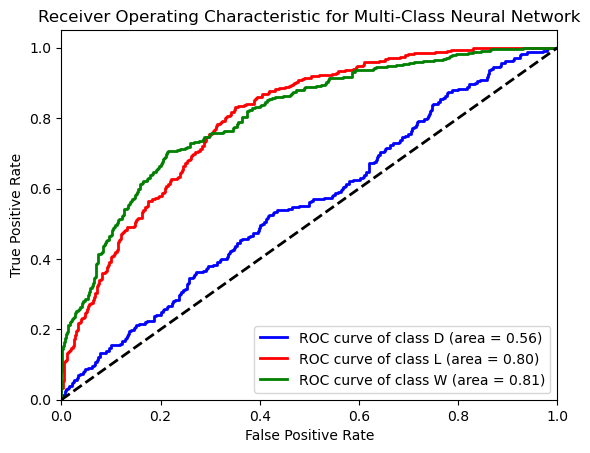

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming X and y are predefined datasets

# Encode categorical variables and target
label_encoder = LabelEncoder()
X['Team'] = label_encoder.fit_transform(X['Team'])
X['Opponent'] = label_encoder.fit_transform(X['Opponent'])
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(set(y_encoded)), activation='softmax')  # output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10)

# Evaluate the model
#loss, accuracy = model.evaluate(X_test_scaled, y_test)
#print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test_scaled)

# Binarize the output classes for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
colors = ['blue', 'red', 'green', 'purple', 'orange']  # Extend colors if more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {label_encoder.inverse_transform([i])[0]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class Neural Network')
plt.legend(loc="lower right")
plt.show()


## 7) Decision Tree Classifier

In [20]:
# Encode categorical variables
label_encoder = LabelEncoder()
X['Team'] = label_encoder.fit_transform(X['Team'])
X['Opponent'] = label_encoder.fit_transform(X['Opponent'])
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = dt_model.predict(X_test_scaled)

# Classification report and accuracy
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Print validation (test) metrics
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")


              precision    recall  f1-score   support

           D       0.30      0.09      0.13       232
           L       0.58      0.67      0.62       368
           W       0.62      0.78      0.69       412

    accuracy                           0.58      1012
   macro avg       0.50      0.51      0.48      1012
weighted avg       0.53      0.58      0.54      1012

Accuracy: 0.5820158102766798
Training Accuracy: 0.6166
Training Precision: 0.5808
Training Recall: 0.6166
Training F1 Score: 0.5609
Validation Accuracy: 0.6067
Validation Precision: 0.5648
Validation Recall: 0.6067
Validation F1 Score: 0.5619


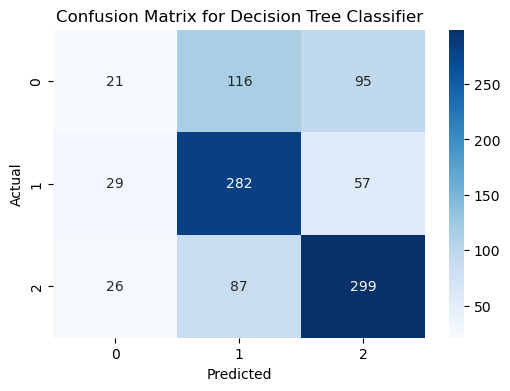

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


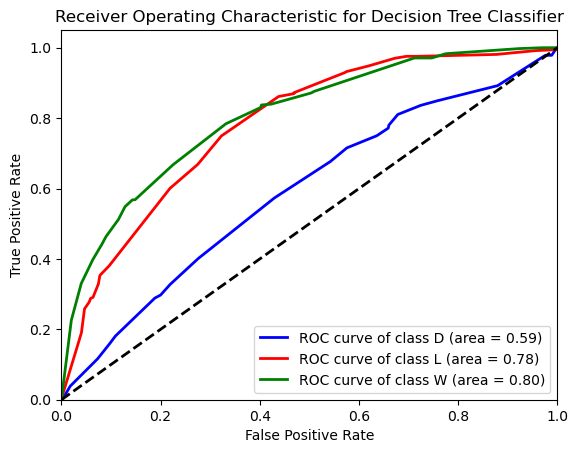

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming X and y are predefined datasets

# Encode categorical variables and target
label_encoder = LabelEncoder()
X['Team'] = label_encoder.fit_transform(X['Team'])
X['Opponent'] = label_encoder.fit_transform(X['Opponent'])
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_probs = dt_model.predict_proba(X_test_scaled)

# Binarize the output classes for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure()
colors = ['blue', 'red', 'green']  # Extend colors if more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


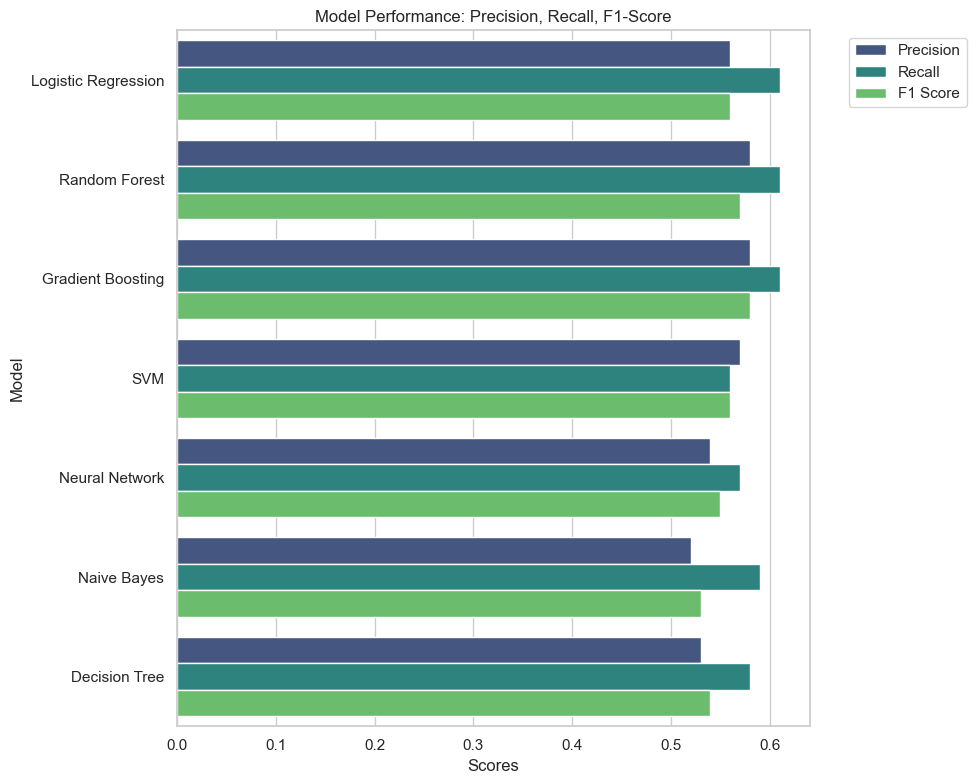

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn for nicer plots style
sns.set(style="whitegrid")

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network', 'Naive Bayes', 'Decision Tree']

# Metrics for each model
precision = [0.56, 0.58, 0.58, 0.57, 0.54, 0.52, 0.53]
recall = [0.61, 0.61, 0.61, 0.56, 0.57, 0.59, 0.58]
f1_score = [0.56, 0.57, 0.58, 0.56, 0.55, 0.53, 0.54]

# Create a DataFrame
df_metrics = pd.DataFrame({
    'Model': models * 3,
    'Score': precision + recall + f1_score,
    'Metric': ['Precision']*7 + ['Recall']*7 + ['F1 Score']*7
})

# Plot for Precision, Recall, and F1-Score
plt.figure(figsize=(10, 8))
sns.barplot(x="Score", y="Model", hue="Metric", data=df_metrics, palette="viridis")
plt.xlabel('Scores')
plt.title('Model Performance: Precision, Recall, F1-Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


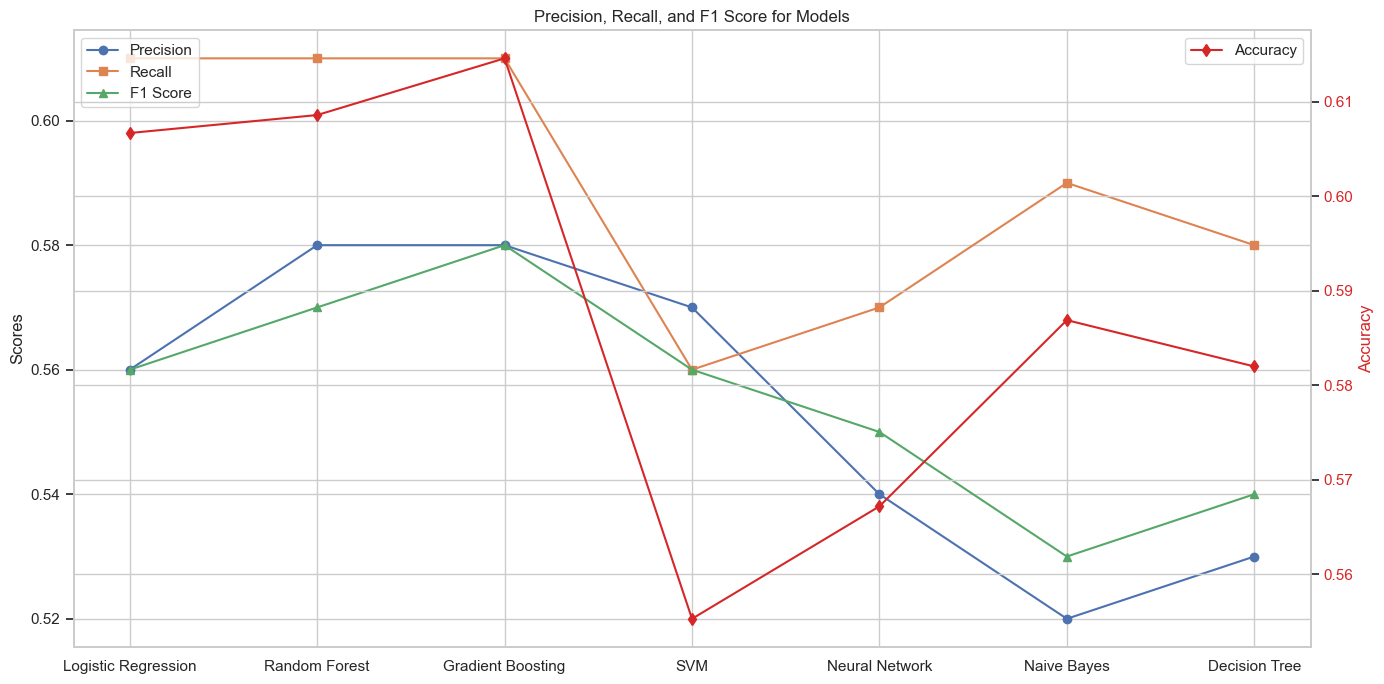

In [22]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network', 'Naive Bayes', 'Decision Tree']

# Metric values
precision = [0.56, 0.58, 0.58, 0.57, 0.54, 0.52, 0.53]
recall = [0.61, 0.61, 0.61, 0.56, 0.57, 0.59, 0.58]
f1_score = [0.56, 0.57, 0.58, 0.56, 0.55, 0.53, 0.54]
accuracy = [0.6067, 0.6086, 0.6146, 0.5553, 0.5672, 0.5869, 0.5820]

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# Generate a line plot for precision, recall, and f1 score
ax1.plot(models, precision, label='Precision', marker='o')
ax1.plot(models, recall, label='Recall', marker='s')
ax1.plot(models, f1_score, label='F1 Score', marker='^')
ax1.set_ylabel('Scores')
ax1.set_title('Precision, Recall, and F1 Score for Models')
ax1.legend(loc='upper left')

# Create a second y-axis for the accuracy line plot
ax2 = ax1.twinx()
ax2.plot(models, accuracy, label='Accuracy', color='tab:red', marker='d')
ax2.set_ylabel('Accuracy', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Show the plot
fig.tight_layout()
plt.show()


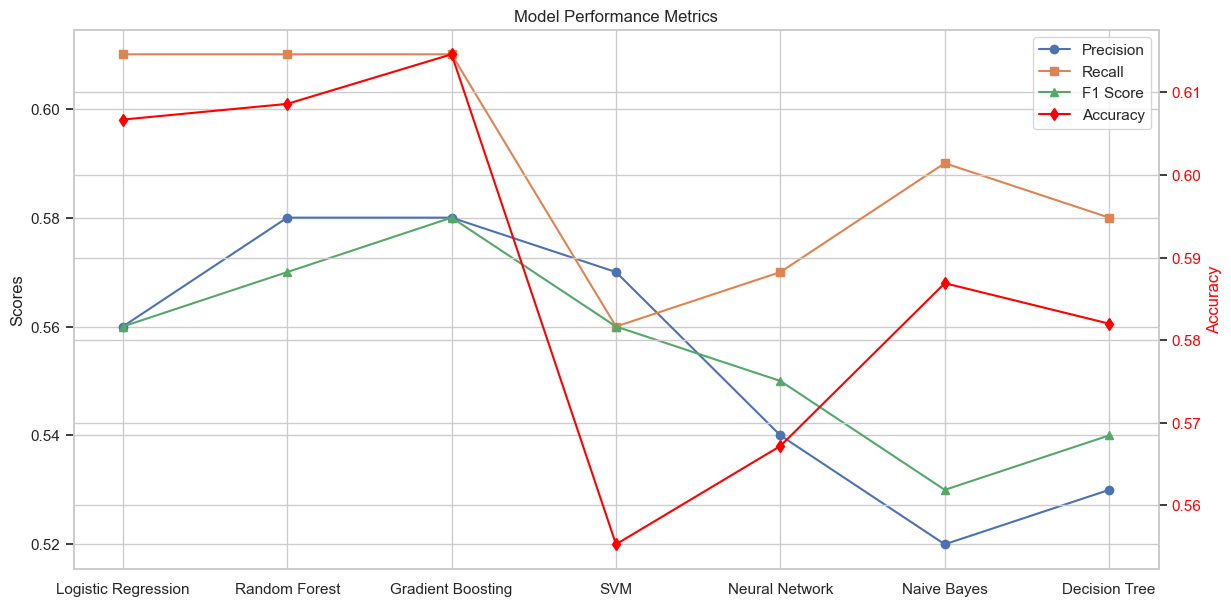

In [40]:
import matplotlib.pyplot as plt

# Assuming you have the metrics collected in a dictionary for each model
# with keys like 'Logistic Regression Precision', 'Logistic Regression Recall', etc.

# Models and their order on the x-axis
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network', 'Naive Bayes', 'Decision Tree']

# Example data structure (replace these with your actual data)
metrics_data = {
  'Precision': [0.56, 0.58, 0.58, 0.57, 0.54, 0.52, 0.53],
    'Recall': [0.61, 0.61, 0.61, 0.56, 0.57, 0.59, 0.58],
    'F1 Score': [0.56, 0.57, 0.58, 0.56, 0.55, 0.53, 0.54],
    'Accuracy': [0.6067, 0.6086, 0.6146, 0.5553, 0.5672, 0.5869, 0.5820]
}
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Precision, Recall, and F1 Score
ax1.plot(models, metrics_data['Precision'], label='Precision', marker='o')
ax1.plot(models, metrics_data['Recall'], label='Recall', marker='s')
ax1.plot(models, metrics_data['F1 Score'], label='F1 Score', marker='^')
ax1.set_ylabel('Scores')
ax1.set_title('Model Performance Metrics')

# Set up the second y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(models, metrics_data['Accuracy'], label='Accuracy', color='red', marker='d')
ax2.set_ylabel('Accuracy', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xticks(rotation=45)
plt.show()
